In [3]:
# Load data & initial setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

from datasets import load_dataset


c:\Users\Gumiuk\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Load dataset
data = load_dataset('lukebarousse/data_jobs')
df = data['train'].to_pandas()

# Convert job posted date column to datetime
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Convert skills column from string to list
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [ ]:
# Filter Dataframe by EU countsry
eu_list = [
    "Albania", "Andorra", "Austria", "Belgium", "Belarus",
    "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Montenegro",
    "Czech Republic", "Denmark", "Estonia", "Finland", "France",
    "Greece", "Spain", "Netherlands", "Ireland", "Iceland", "Kosovo",
    "Liechtenstein", "Lithuania", "Luxembourg", "Latvia",
    "North Macedonia", "Malta", "Moldova", "Monaco", "Germany",
    "Norway", "Poland", "Portugal", "Romania", "Russia",
    "San Marino", "Serbia", "Slovakia", "Slovenia", "Switzerland",
    "Sweden", "Turkey", "Ukraine", "Vatican City", "Hungary",
    "United Kingdom", "Italy"
]


df_eu = df.copy()
df_eu = df_eu[df_eu['job_location'].isin(eu_list)]

In [6]:
# Explode skill column to seperate rows

df_explode = df_eu.explode(column='job_skills')

# Group and count by skill & job title
df_grouped = df_explode.groupby(['job_skills','job_title_short']).agg('size').reset_index(name='skill_count').sort_values(by='skill_count',ascending=False)
df_grouped

,job_skills,job_title_short,skill_count
1387,sql,Data Engineer,5026
1097,python,Data Engineer,4941
1386,sql,Data Analyst,4458
1098,python,Data Scientist,4299
110,azure,Data Engineer,3167
...,...,...,...
1695,yarn,Machine Learning Engineer,1
35,angular.js,Data Scientist,1
34,angular.js,Data Analyst,1
13,airtable,Data Scientist,1


In [7]:
# Aggregate total job postings by job title
df_job_title_count = df_eu['job_title_short'].value_counts().reset_index(name='jobs_total')

# Merge dataframes to include percentage per 
df_skill_perc = pd.merge(df_grouped,df_job_title_count,how='left')

# Calculate the percentage of job postings requiring each skill
df_skill_perc['percentage'] = round((df_skill_perc['skill_count'] / df_skill_perc['jobs_total']) *100)
df_skill_perc

,job_skills,job_title_short,skill_count,jobs_total,percentage
0,sql,Data Engineer,5026,8973,56.0
1,python,Data Engineer,4941,8973,55.0
2,sql,Data Analyst,4458,10392,43.0
3,python,Data Scientist,4299,7166,60.0
4,azure,Data Engineer,3167,8973,35.0
...,...,...,...,...,...
1704,yarn,Machine Learning Engineer,1,882,0.0
1705,angular.js,Data Scientist,1,7166,0.0
1706,angular.js,Data Analyst,1,10392,0.0
1707,airtable,Data Scientist,1,7166,0.0


['Data Engineer', 'Data Analyst', 'Data Scientist']


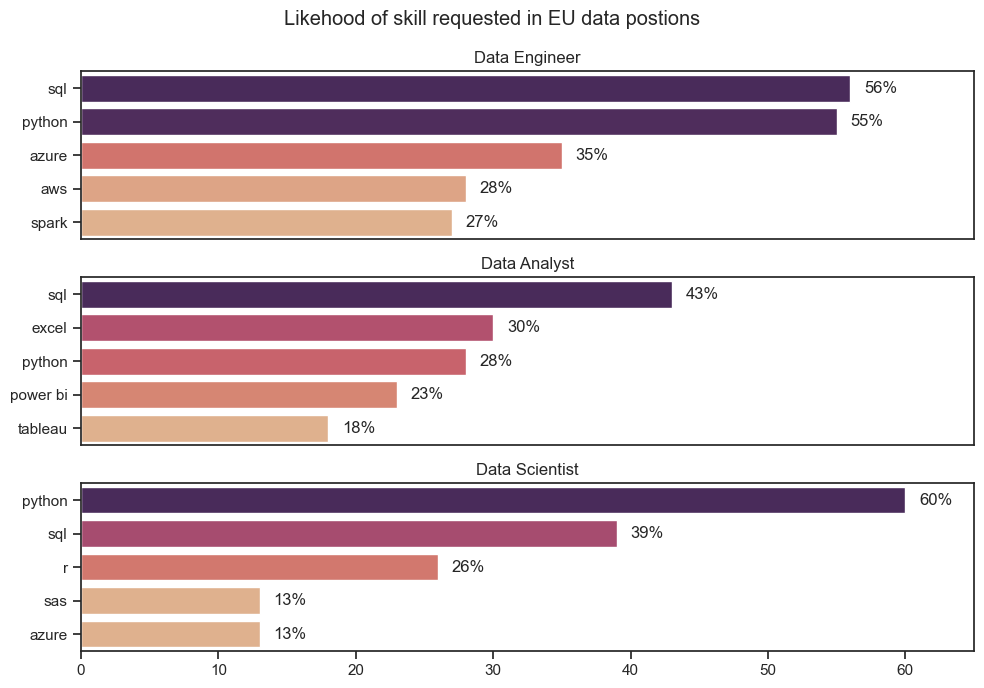

In [ ]:
# Create list of 3 data job positions
data_list = df_grouped['job_title_short'].unique().tolist()[:3]

# Set plot size, structure and theme
fig,ax = plt.subplots(3,1,figsize=(10,7))
sns.set_theme(style='ticks')

# Create bar charts showing the top 5 skills by demand percentage for each job title
for i,job_title in enumerate(data_list):

    # Filter top 5 skills for the current job title
    df_plot = df_skill_perc[df_skill_perc['job_title_short'] == job_title].head(5)

    # Plot skill demand percentage
    sns.barplot(data=df_plot,
                x='percentage',
                y='job_skills',
                ax=ax[i],
                hue='skill_count',
                palette='flare')

 # Customize subplot
    ax[i].set_title(job_title)
    ax[i].legend().remove()
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_xlim(0,65)

    # Add percentage labels to bars
    for n,v in enumerate(df_plot['percentage']):
        ax[i].text(v+1,n,f'{v:.0f}%',va='center')
        
    # Hide x-axis ticks for all but the last subplot    
    if i != len(data_list) - 1:
        ax[i].set_xticks([])

fig.suptitle('Likehood of skill requested in EU data postions')
plt.tight_layout()
plt.show()